**Fetal skin**

1. remove NK2
2. Angiogenic pericyte --> Mural cell LMCD1+; Contractile pericyte --> Mural cell PLN+; pericyte --> Mural cell pericyte or just Pericyte; Basal SHH+ -> Matrix/placode

**Pooled fetal skin organoid**

1. Fibroblasts POSTN+ -> Fibroblasts WNT2+/PEAR1+
2. Smooth muscle/pericyte -> Mural cell

# Import and settings

In [1]:
%load_ext autoreload
%autoreload 2

import os, re, gc, joblib
import numpy as np
import numpy_groupies as npg
import pandas as pd

import anndata
import scanpy as sc
import sctk as sk

import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.colors import ListedColormap
import seaborn as sn
import plotnine as pln

In [2]:
np.set_printoptions(linewidth=150)

rcParams["pdf.fonttype"] = 42
rcParams["ps.fonttype"] = 42

sc.settings.verbosity = 0
expr_cmap = sk.expression_colormap()
sk.set_figsize((4, 4))

In [3]:
from time import localtime, strftime
def timestamp(date_only=True):
    stamp_format = "%Y%m%d" if date_only else "%Y%m%d-%H%M"
    return strftime(stamp_format, localtime())

# Find inputs

In [4]:
!ls cellxgene_h5ad/

fetal_skin.endothelium.cellxgene.20211215.h5ad
fetal_skin.erythroid.cellxgene.20211215.h5ad
fetal_skin.fibroblasts.cellxgene.20211215.h5ad
fetal_skin.keratinocytes.cellxgene.20211215.h5ad
fetal_skin.lymphoid_B.cellxgene.20211215.h5ad
fetal_skin.lymphoid_T_NK.cellxgene.20211215.h5ad
fetal_skin.mast.cellxgene.20211215.h5ad
fetal_skin.melanocytes.cellxgene.20211215.h5ad
fetal_skin.muscle.cellxgene.20211215.h5ad
fetal_skin.myeloid.cellxgene.20211215.h5ad
fetal_skin.neuronal.cellxgene.20211215.h5ad
fetal_skin.stroma.cellxgene.20211215.h5ad


In [5]:
!ls *.h5ad

fetal_skin.norm.maternal_removed.20210611.h5ad
fetal_skin.norm.maternal_removed.20211208.h5ad
fetal_skin.norm.maternal_removed.20211215.h5ad
fetal_skin.norm.maternal_removed.downsampled_by_joint_annotation_rnd100.20211215.h5ad
fetal_skin.norm.maternal_removed.downsampled_rnd200.20210611.h5ad
fetal_skin.norm.maternal_removed.downsampled_rnd200.20211208.h5ad
fetal_skin.norm.maternal_removed.downsampled_rnd200.20211215.h5ad


# Update overall object

In [6]:
fsk_all_ad = sc.read("fetal_skin.norm.maternal_removed.20211215.h5ad")

In [7]:
fsk_all_ad.obs.columns

Index(['sanger_id', 'chemistry', 'donor', 'gender', 'pcw', 'sorting', 'sample',
       'chemistry_sorting', 'cell_caller', 'scrublet_score',
       'cluster_scrublet_score', 'doublet_pval', 'bh_doublet_pval', 'n_counts',
       'n_genes', 'percent_mito', 'percent_ribo', 'percent_hb',
       'independent_annotation_refined', 'independent_annotation_broad1',
       'independent_annotation_broad2', 'independent_annotation_broad3',
       'independent_annotation_broad4', 'independent_annotation_broad5',
       'joint_annotation', 'is_maternal', 'fig1b_annotation'],
      dtype='object')

In [30]:
fsk_all_ad.obs.joint_annotation.cat.categories

Index(['ASDC', 'Activated mac', 'Adipocytes', 'Angiogenic pericyte',
       'Arterial', 'B cell', 'Basal', 'Basal POSTN+', 'Basal SHH+',
       'CD4 T cell', 'CD8 T cell', 'Capillary (venular tip)',
       'Capillary/postcapillary venule', 'Companion layer',
       'Contractile pericyte', 'Cuticle/cortex', 'DC1', 'DC2',
       'Dermal condensate', 'Dermal papillia', 'Early LE',
       'Early endothelial cell', 'Early erythroid',
       'Early erythroid (embryonic)', 'Early fibroblast FRZB+',
       'Early fibroblast HOXC5+', 'Early myocytes',
       'Eo/baso/mast cell progenitor', 'Erythroid (embryonic)',
       'Erythroid (fetal)', 'Fibroblast PEAR1+', 'Fibroblast WNT2+', 'HSC',
       'ILC2', 'ILC3', 'Immature basal', 'Immature suprabasal',
       'Inflammatory DC', 'Innate T type1', 'Innate T type3',
       'Inner root sheath', 'LC', 'LE', 'LTi', 'Lymphoid progenitor',
       'MEMP - Early erythroid', 'MEMP - Megak', 'Mac-mono', 'Macrophage1',
       'Macrophage2', 'Mast cell (earli

In [35]:
fsk_all_ad.obs["joint_annotation_20220201a"] = fsk_all_ad.obs.joint_annotation.cat.rename_categories({"Angiogenic pericyte": "Mural cell LMCD1+", "Contractile pericyte": "Mural cell PLN+", "Basal SHH+": "Matrix/placode"})

In [36]:
fsk_all_ad.obs.joint_annotation_20220201a.cat.categories

Index(['ASDC', 'Activated mac', 'Adipocytes', 'Mural cell LMCD1+', 'Arterial',
       'B cell', 'Basal', 'Basal POSTN+', 'Matrix/placode', 'CD4 T cell',
       'CD8 T cell', 'Capillary (venular tip)',
       'Capillary/postcapillary venule', 'Companion layer', 'Mural cell PLN+',
       'Cuticle/cortex', 'DC1', 'DC2', 'Dermal condensate', 'Dermal papillia',
       'Early LE', 'Early endothelial cell', 'Early erythroid',
       'Early erythroid (embryonic)', 'Early fibroblast FRZB+',
       'Early fibroblast HOXC5+', 'Early myocytes',
       'Eo/baso/mast cell progenitor', 'Erythroid (embryonic)',
       'Erythroid (fetal)', 'Fibroblast PEAR1+', 'Fibroblast WNT2+', 'HSC',
       'ILC2', 'ILC3', 'Immature basal', 'Immature suprabasal',
       'Inflammatory DC', 'Innate T type1', 'Innate T type3',
       'Inner root sheath', 'LC', 'LE', 'LTi', 'Lymphoid progenitor',
       'MEMP - Early erythroid', 'MEMP - Megak', 'Mac-mono', 'Macrophage1',
       'Macrophage2', 'Mast cell (earliest)', 'Ma

In [37]:
fsk_all_ad.obs["joint_annotation_20220201b"] = sk.regroup(fsk_all_ad, groupby="joint_annotation_20220201a", regroups={"Macrophage": ["Macrophage1", "Macrophage2"]})

In [38]:
fsk_all_ad.obs.joint_annotation_20220201b.cat.categories

Index(['ASDC', 'Activated mac', 'Adipocytes', 'Arterial', 'B cell', 'Basal',
       'Basal POSTN+', 'CD4 T cell', 'CD8 T cell', 'Capillary (venular tip)',
       'Capillary/postcapillary venule', 'Companion layer', 'Cuticle/cortex',
       'DC1', 'DC2', 'Dermal condensate', 'Dermal papillia', 'Early LE',
       'Early endothelial cell', 'Early erythroid',
       'Early erythroid (embryonic)', 'Early fibroblast FRZB+',
       'Early fibroblast HOXC5+', 'Early myocytes',
       'Eo/baso/mast cell progenitor', 'Erythroid (embryonic)',
       'Erythroid (fetal)', 'Fibroblast PEAR1+', 'Fibroblast WNT2+', 'HSC',
       'ILC2', 'ILC3', 'Immature basal', 'Immature suprabasal',
       'Inflammatory DC', 'Innate T type1', 'Innate T type3',
       'Inner root sheath', 'LC', 'LE', 'LTi', 'Lymphoid progenitor',
       'MEMP - Early erythroid', 'MEMP - Megak', 'Mac-mono', 'Macrophage',
       'Mast cell (earliest)', 'Mast cell (medium)', 'Mast cell (most mature)',
       'Matrix/placode', 'Megakaryo

In [39]:
fsk_all_ad.obs.independent_annotation_refined.cat.categories

Index(['ASDC', 'Activated mac', 'Adipocytes', 'Angiogenic pericyte',
       'Arterial', 'B cell', 'Basal KC', 'CD4 T cell', 'CD8 T cell',
       'Capillary (venular tip)', 'Capillary/postcapillary venule',
       'Contractile pericyte', 'DC1', 'DC2', 'Dermal condensate',
       'Dermal papillia', 'Early KC (stem cell)', 'Early LE',
       'Early endothelial cell', 'Early erythroid',
       'Early erythroid (embryonic)', 'Early fibroblast FRZB+',
       'Early fibroblast HOXC5+', 'Early myocytes',
       'Eo/baso/mast cell progenitor', 'Erythroid (embryonic)',
       'Erythroid (fetal)', 'Fibroblast PEAR1+', 'Fibroblast WNT2+', 'HSC',
       'Hair follicle', 'ILC2', 'ILC3', 'Inflammatory DC', 'Innate T type1',
       'Innate T type3', 'LC', 'LE', 'LTi cell', 'Lymphoid progenitor',
       'MEMP - Early erythroid', 'MEMP - Megak', 'Mac-mono', 'Macrophage1',
       'Macrophage2', 'Mast cell (earliest)', 'Mast cell (medium)',
       'Mast cell (most mature)', 'Megakaryocyte', 'Melanoblast',

In [40]:
fsk_all_ad.obs["independent_annotation_refined_20220201a"] = fsk_all_ad.obs.independent_annotation_refined.cat.rename_categories({"Angiogenic pericyte": "Mural cell LMCD1+", "Contractile pericyte": "Mural cell PLN+", "Basal SHH+": "Matrix/placode"})

In [41]:
fsk_all_ad.obs.independent_annotation_refined_20220201a.cat.categories

Index(['ASDC', 'Activated mac', 'Adipocytes', 'Mural cell LMCD1+', 'Arterial',
       'B cell', 'Basal KC', 'CD4 T cell', 'CD8 T cell',
       'Capillary (venular tip)', 'Capillary/postcapillary venule',
       'Mural cell PLN+', 'DC1', 'DC2', 'Dermal condensate', 'Dermal papillia',
       'Early KC (stem cell)', 'Early LE', 'Early endothelial cell',
       'Early erythroid', 'Early erythroid (embryonic)',
       'Early fibroblast FRZB+', 'Early fibroblast HOXC5+', 'Early myocytes',
       'Eo/baso/mast cell progenitor', 'Erythroid (embryonic)',
       'Erythroid (fetal)', 'Fibroblast PEAR1+', 'Fibroblast WNT2+', 'HSC',
       'Hair follicle', 'ILC2', 'ILC3', 'Inflammatory DC', 'Innate T type1',
       'Innate T type3', 'LC', 'LE', 'LTi cell', 'Lymphoid progenitor',
       'MEMP - Early erythroid', 'MEMP - Megak', 'Mac-mono', 'Macrophage1',
       'Macrophage2', 'Mast cell (earliest)', 'Mast cell (medium)',
       'Mast cell (most mature)', 'Megakaryocyte', 'Melanoblast', 'Melanocyte',

In [42]:
fsk_all_ad.obs["independent_annotation_refined_20220201b"] = sk.regroup(fsk_all_ad, groupby="independent_annotation_refined_20220201a", regroups={"Macrophage": ["Macrophage1", "Macrophage2"]})

In [19]:
fsk_all_ad.obs.independent_annotation_refined_20220201b.cat.categories

Index(['ASDC', 'Activated mac', 'Adipocytes', 'Arterial', 'B cell', 'Basal KC',
       'CD4 T cell', 'CD8 T cell', 'Capillary (venular tip)',
       'Capillary/postcapillary venule', 'DC1', 'DC2', 'Dermal condensate',
       'Dermal papillia', 'Early KC (stem cell)', 'Early LE',
       'Early endothelial cell', 'Early erythroid',
       'Early erythroid (embryonic)', 'Early fibroblast FRZB+',
       'Early fibroblast HOXC5+', 'Early myocytes',
       'Eo/baso/mast cell progenitor', 'Erythroid (embryonic)',
       'Erythroid (fetal)', 'Fibroblast PEAR1+', 'Fibroblast WNT2+', 'HSC',
       'Hair follicle', 'ILC2', 'ILC3', 'Inflammatory DC', 'Innate T type1',
       'Innate T type3', 'LC', 'LE', 'LTi cell', 'Lymphoid progenitor',
       'MEMP - Early erythroid', 'MEMP - Megak', 'Mac-mono', 'Macrophage',
       'Mast cell (earliest)', 'Mast cell (medium)', 'Mast cell (most mature)',
       'Megakaryocyte', 'Melanoblast', 'Melanocyte', 'Microglia', 'Monocyte',
       'Monocyte (activated/di

In [20]:
fsk_all_ad.obs.independent_annotation_broad1.cat.categories

Index(['ASDC', 'Adipocyte', 'B cell', 'Basal KC', 'CD4 T cell', 'CD8 T cell',
       'DC1', 'DC2', 'Early erythroid', 'Erythroid', 'Fibroblast FRZB+',
       'Fibroblast HF', 'Fibroblast HOX5+', 'Fibroblast WNT2+',
       'Fibroblast dermal papillia', 'Fibroblast unknown',
       'Granulocyte progenitor', 'HF KC', 'HSC', 'ILC2', 'ILC3',
       'Innate T cell', 'Langerhans cell', 'Lti', 'Lymphatic endothelium',
       'Lymphoid progenitor', 'MEMP', 'Mac-mono', 'Macrophage', 'Mast cell',
       'Megakaryocyte', 'Melanoblast', 'Melanocyte', 'Microglia', 'Monocyte',
       'Monocyte precursor', 'Myofibroblast', 'NK cell', 'Neuronal cells',
       'Neutrophil', 'Pericyte', 'Periderm', 'Schwann cell', 'Skeletal muscle',
       'Suprabasal KC', 'Treg', 'Vascular endothelium', 'pDC'],
      dtype='object')

In [21]:
fsk_all_ad.obs["independent_annotation_broad1_20220201"] = fsk_all_ad.obs.independent_annotation_broad1.cat.rename_categories({"Pericyte": "Mural cell"})

In [22]:
fsk_all_ad.obs.independent_annotation_broad1_20220201.cat.categories

Index(['ASDC', 'Adipocyte', 'B cell', 'Basal KC', 'CD4 T cell', 'CD8 T cell',
       'DC1', 'DC2', 'Early erythroid', 'Erythroid', 'Fibroblast FRZB+',
       'Fibroblast HF', 'Fibroblast HOX5+', 'Fibroblast WNT2+',
       'Fibroblast dermal papillia', 'Fibroblast unknown',
       'Granulocyte progenitor', 'HF KC', 'HSC', 'ILC2', 'ILC3',
       'Innate T cell', 'Langerhans cell', 'Lti', 'Lymphatic endothelium',
       'Lymphoid progenitor', 'MEMP', 'Mac-mono', 'Macrophage', 'Mast cell',
       'Megakaryocyte', 'Melanoblast', 'Melanocyte', 'Microglia', 'Monocyte',
       'Monocyte precursor', 'Myofibroblast', 'NK cell', 'Neuronal cells',
       'Neutrophil', 'Mural cell', 'Periderm', 'Schwann cell',
       'Skeletal muscle', 'Suprabasal KC', 'Treg', 'Vascular endothelium',
       'pDC'],
      dtype='object')

In [23]:
fsk_all_ad.obs.independent_annotation_broad2.cat.categories

Index(['Adipocyte', 'B cell', 'Basal KC', 'CD4 T cell', 'CD8 T cell',
       'Dermal condensate', 'Erythroid', 'Fibroblast',
       'Granulocyte progenitor', 'HF KC', 'HSC', 'ILC', 'Innate T cell',
       'Langerhans cell', 'Lymphatic endothelium', 'MEMP', 'Macrophage',
       'Mast cell', 'Megakaryocyte', 'Melanocyte', 'Microglia', 'Monocyte',
       'Monocyte precursor', 'Myofibroblast', 'NK cell', 'Neuronal cells',
       'Neutrophil', 'Pericyte', 'Periderm', 'Schwann cell', 'Skeletal muscle',
       'Suprabasal KC', 'Treg', 'Vascular endothelium', 'cDC', 'pDC'],
      dtype='object')

In [24]:
fsk_all_ad.obs["independent_annotation_broad2_20220201"] = fsk_all_ad.obs.independent_annotation_broad2.cat.rename_categories({"Pericyte": "Mural cell"})

In [25]:
fsk_all_ad.obs.independent_annotation_broad2_20220201.cat.categories

Index(['Adipocyte', 'B cell', 'Basal KC', 'CD4 T cell', 'CD8 T cell',
       'Dermal condensate', 'Erythroid', 'Fibroblast',
       'Granulocyte progenitor', 'HF KC', 'HSC', 'ILC', 'Innate T cell',
       'Langerhans cell', 'Lymphatic endothelium', 'MEMP', 'Macrophage',
       'Mast cell', 'Megakaryocyte', 'Melanocyte', 'Microglia', 'Monocyte',
       'Monocyte precursor', 'Myofibroblast', 'NK cell', 'Neuronal cells',
       'Neutrophil', 'Mural cell', 'Periderm', 'Schwann cell',
       'Skeletal muscle', 'Suprabasal KC', 'Treg', 'Vascular endothelium',
       'cDC', 'pDC'],
      dtype='object')

In [26]:
fsk_all_ad.obs.independent_annotation_broad3.cat.categories

Index(['Adipocyte', 'B cell', 'DC', 'Dermal condensate', 'Erythroid',
       'Fibroblast', 'Granulocyte progenitor', 'HSC', 'ILC', 'KC',
       'Langerhans cell', 'Lymphatic endothelium', 'MEMP', 'Macrophage',
       'Mast cell', 'Megakaryocyte', 'Melanocyte', 'Microglia', 'Monocyte',
       'Monocyte precursor', 'Muscle', 'Myofibroblast', 'NK cell',
       'Neuronal cells', 'Neutrophil', 'Pericyte', 'T cell',
       'Vascular endothelium'],
      dtype='object')

In [27]:
fsk_all_ad.obs["independent_annotation_broad3_20220201"] = fsk_all_ad.obs.independent_annotation_broad3.cat.rename_categories({"Pericyte": "Mural cell"})

In [28]:
fsk_all_ad.obs.independent_annotation_broad3_20220201.cat.categories

Index(['Adipocyte', 'B cell', 'DC', 'Dermal condensate', 'Erythroid',
       'Fibroblast', 'Granulocyte progenitor', 'HSC', 'ILC', 'KC',
       'Langerhans cell', 'Lymphatic endothelium', 'MEMP', 'Macrophage',
       'Mast cell', 'Megakaryocyte', 'Melanocyte', 'Microglia', 'Monocyte',
       'Monocyte precursor', 'Muscle', 'Myofibroblast', 'NK cell',
       'Neuronal cells', 'Neutrophil', 'Mural cell', 'T cell',
       'Vascular endothelium'],
      dtype='object')

In [29]:
fsk_all_ad.obs.independent_annotation_broad4.cat.categories

Index(['Antigen Presenting Cells', 'Endothelium', 'Epithelium', 'Erythroid',
       'Lymphocytes', 'Mesenchymal cells', 'Muscle', 'Neuronal cells',
       'Other blood cells'],
      dtype='object')

In [47]:
fsk_all_ad.obs.fig1b_annotation.cat.categories

Index(['Adipocyte', 'B cell', 'Dermal condensate', 'Erythroid', 'Fibroblast',
       'ILC', 'Keratinocyte', 'Langerhans cell', 'Lymphatic endothelium',
       'Macrophage', 'Mast cell', 'Megakaryocyte', 'Melanocyte', 'Microglia',
       'Monocyte', 'Myofibroblast', 'Neuronal cells', 'Neutrophil', 'Pericyte',
       'Progenitor', 'Schwann cell', 'Skeletal muscle', 'T cell',
       'Vascular endothelium', 'cDC', 'pDC'],
      dtype='object')

In [48]:
fsk_all_ad.obs["fig1b_annotation_20220201"] = fsk_all_ad.obs.fig1b_annotation.cat.rename_categories({"Pericyte": "Mural cell"})

In [49]:
fsk_all_ad.obs.fig1b_annotation_20220201.cat.categories

Index(['Adipocyte', 'B cell', 'Dermal condensate', 'Erythroid', 'Fibroblast',
       'ILC', 'Keratinocyte', 'Langerhans cell', 'Lymphatic endothelium',
       'Macrophage', 'Mast cell', 'Megakaryocyte', 'Melanocyte', 'Microglia',
       'Monocyte', 'Myofibroblast', 'Neuronal cells', 'Neutrophil',
       'Mural cell', 'Progenitor', 'Schwann cell', 'Skeletal muscle', 'T cell',
       'Vascular endothelium', 'cDC', 'pDC'],
      dtype='object')

In [50]:
fsk_all_ad2 = fsk_all_ad[fsk_all_ad.obs.independent_annotation_refined_20220201a != "NK cell 2"].copy()

In [51]:
fsk_all_ad2

AnnData object with n_obs × n_vars = 186533 × 28885
    obs: 'sanger_id', 'chemistry', 'donor', 'gender', 'pcw', 'sorting', 'sample', 'chemistry_sorting', 'cell_caller', 'scrublet_score', 'cluster_scrublet_score', 'doublet_pval', 'bh_doublet_pval', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'percent_hb', 'independent_annotation_refined', 'independent_annotation_broad1', 'independent_annotation_broad2', 'independent_annotation_broad3', 'independent_annotation_broad4', 'independent_annotation_broad5', 'joint_annotation', 'is_maternal', 'fig1b_annotation', 'independent_annotation_refined_20220201a', 'independent_annotation_refined_20220201b', 'independent_annotation_broad1_20220201', 'independent_annotation_broad2_20220201', 'independent_annotation_broad3_20220201', 'joint_annotation_20220201a', 'joint_annotation_20220201b', 'fig1b_annotation_20220201'
    var: 'gene_ids', 'mito', 'ribo', 'hb', 'n_cells', 'cc', 'n_counts'
    obsm: 'X_umap1', 'X_umap2'

In [52]:
fsk_all_ad2.write(f"fetal_skin.norm.maternal_removed.{timestamp()}.h5ad", compression="lzf")

# Make cellxgene objects per compartment

In [54]:
old_cxg_h5ads = !ls cellxgene_h5ad

In [55]:
old_cxg_h5ads

['fetal_skin.endothelium.cellxgene.20211215.h5ad',
 'fetal_skin.erythroid.cellxgene.20211215.h5ad',
 'fetal_skin.fibroblasts.cellxgene.20211215.h5ad',
 'fetal_skin.keratinocytes.cellxgene.20211215.h5ad',
 'fetal_skin.lymphoid_B.cellxgene.20211215.h5ad',
 'fetal_skin.lymphoid_T_NK.cellxgene.20211215.h5ad',
 'fetal_skin.mast.cellxgene.20211215.h5ad',
 'fetal_skin.melanocytes.cellxgene.20211215.h5ad',
 'fetal_skin.muscle.cellxgene.20211215.h5ad',
 'fetal_skin.myeloid.cellxgene.20211215.h5ad',
 'fetal_skin.neuronal.cellxgene.20211215.h5ad',
 'fetal_skin.stroma.cellxgene.20211215.h5ad']

In [64]:
for name in pd.Series(old_cxg_h5ads).str.split(".", expand=True)[1].values:
    print(name, end=": ")
    old_h5ad = f"cellxgene_h5ad/fetal_skin.{name}.cellxgene.20211215.h5ad"
    old_obs = sk.read_h5ad(old_h5ad, component="obs")
    old_obsm = sk.read_h5ad(old_h5ad, component="obsm")
    old_k = old_obs.index.isin(fsk_all_ad2.obs_names)
    common_cells = old_obs.index[old_k]
    print(common_cells.size)
    if common_cells.size == 0 or np.any(
        common_cells != fsk_all_ad2.obs_names[fsk_all_ad2.obs_names.isin(common_cells)]
    ):
        print(f"pass {name}")
        continue
    new_ad = fsk_all_ad2[fsk_all_ad2.obs_names.isin(common_cells)]
    for obsm_key in old_obsm.keys():
        embed = old_obsm[obsm_key][old_k, :]
        new_ad.obsm[obsm_key] = embed.copy()
    new_ad.write(f"cellxgene_h5ad/fetal_skin.{name}.cellxgene.{timestamp()}.h5ad", compression="lzf")
    del new_ad

endothelium: 2173
erythroid: 3468
fibroblasts: 90807
keratinocytes: 1469
lymphoid_B: 3676
lymphoid_T_NK: 17551
mast: 2641
melanocytes: 794
muscle: 15188
myeloid: 35151
neuronal: 5643
stroma: 119610


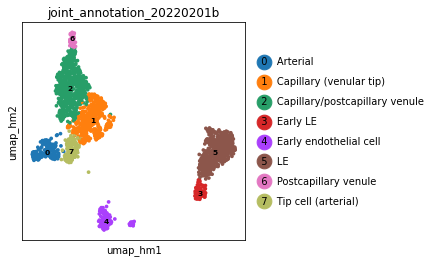

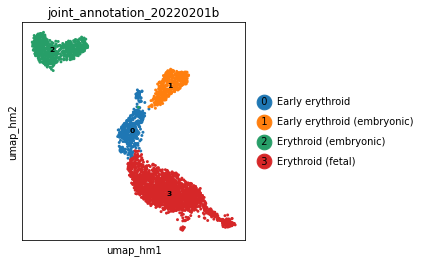

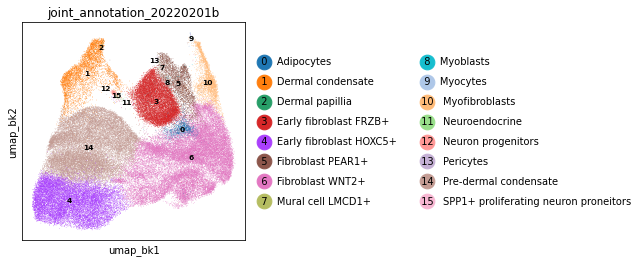

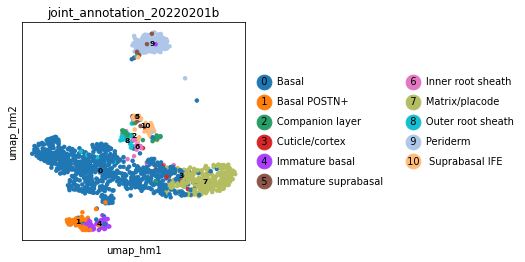

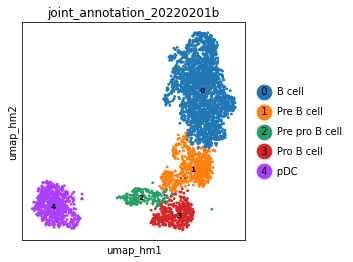

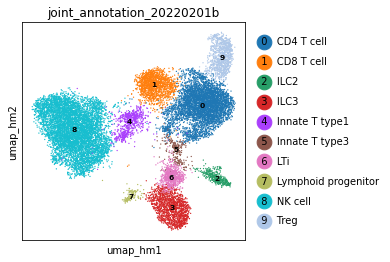

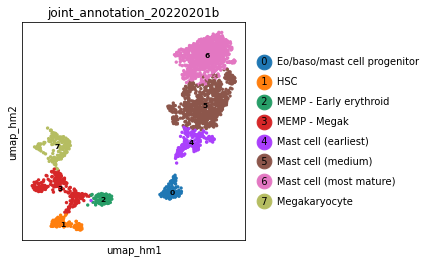

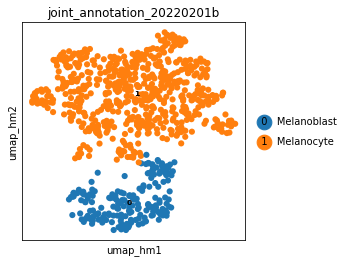

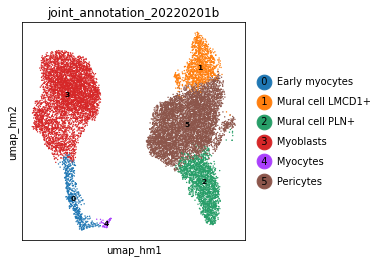

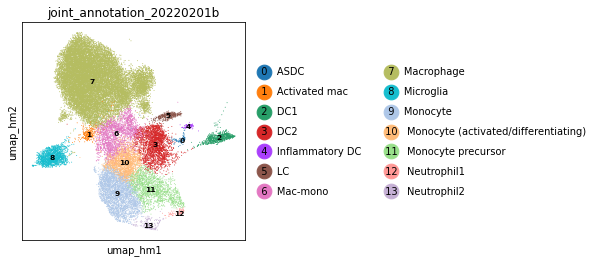

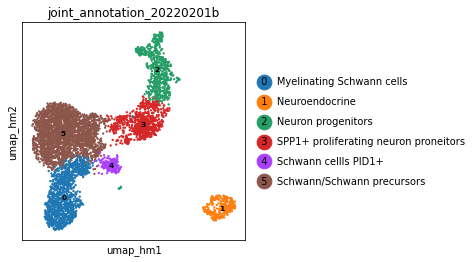

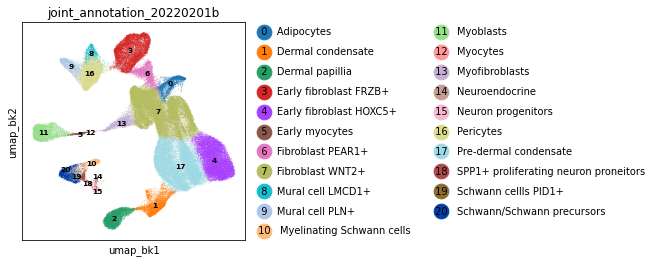

In [66]:
for name in pd.Series(old_cxg_h5ads).str.split(".", expand=True)[1].values:
    new_ad = sc.read(f"cellxgene_h5ad/fetal_skin.{name}.cellxgene.{timestamp()}.h5ad", backed="r")
    basis = "umap_bk" if name in ("stroma", "fibroblasts") else "umap_hm"
    sk.plot_embedding(new_ad, basis=basis, groupby="joint_annotation_20220201b");
    sk.clear_colors(new_ad)
    del new_ad